In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [3]:
# loading Data set
df = pd.read_csv('breast-cancer.csv')

In [5]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
# dropping first column
# df = df.iloc[:,0:2]

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
df.diagnosis

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [10]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
# applying label emcoding on labels(target) columns
encoder = LabelEncoder()
df.diagnosis = encoder.fit_transform(df['diagnosis']) 

In [26]:
# Since we have three class in labels, we are dropping one to make it binary classes
# df = df[df['diagnosis']][['diagnosis','radius_mean','texture_mean']]

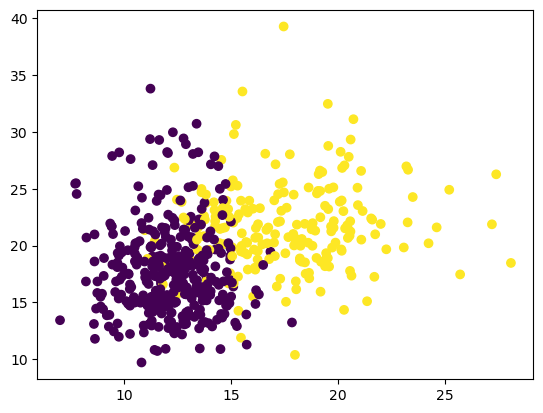

In [13]:
# plotting sepal widht and petal length 
plt.scatter(df['radius_mean'],df['texture_mean'],c=df['diagnosis'],cmap=None)

In [14]:
df_train = df.iloc[:360,:]. sample(30)
df_train

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
86,86135501,1,14.480,21.46,94.25,648.2,0.09444,0.09947,0.120400,0.049380,...,16.210,29.25,108.40,808.9,0.13060,0.19760,0.334900,0.12250,0.3020,0.06846
118,864877,1,15.780,22.91,105.70,782.6,0.11550,0.17520,0.213300,0.094790,...,20.190,30.50,130.30,1272.0,0.18550,0.49250,0.735600,0.20340,0.3274,0.12520
117,864729,1,14.870,16.67,98.64,682.5,0.11620,0.16490,0.169000,0.089230,...,18.810,27.37,127.10,1095.0,0.18780,0.44800,0.470400,0.20270,0.3585,0.10650
276,8911230,0,11.330,14.16,71.79,396.6,0.09379,0.03872,0.001487,0.003333,...,12.200,18.99,77.37,458.0,0.12590,0.07348,0.004955,0.01111,0.2758,0.06386
23,851509,1,21.160,23.04,137.20,1404.0,0.09428,0.10220,0.109700,0.086320,...,29.170,35.59,188.00,2615.0,0.14010,0.26000,0.315500,0.20090,0.2822,0.07526
98,862485,0,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,...,13.060,17.16,82.96,512.5,0.14310,0.18510,0.192200,0.08449,0.2772,0.08756
56,857637,1,19.210,18.57,125.50,1152.0,0.10530,0.12670,0.132300,0.089940,...,26.140,28.14,170.10,2145.0,0.16240,0.35110,0.387900,0.20910,0.3537,0.08294
85,8612399,1,18.460,18.52,121.10,1075.0,0.09874,0.10530,0.133500,0.087950,...,22.930,27.68,152.20,1603.0,0.13980,0.20890,0.315700,0.16420,0.3695,0.08579
5,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.17410,0.3985,0.12440
314,894047,0,8.597,18.60,54.09,221.2,0.10740,0.05847,0.000000,0.000000,...,8.952,22.44,56.65,240.1,0.13470,0.07767,0.000000,0.00000,0.3142,0.08116


In [15]:
df = df.sample(569)
df_train = df.iloc[:360,:].sample(50)
df_val= df.iloc[360:425,:].sample(15)
df_test = df.iloc[425:,:].sample(15)


In [16]:
# considering first 60 records are trainnig data 
df_train = df.iloc[:360,:].sample(50)

# considering next 20 record after 60  are validation
df_val= df.iloc[360:425,:].sample(15)

# considering next 20 record after 60  are testing data
df_test = df.iloc[425:,:].sample(15)

In [17]:
# validation data and labels from validation data 
X_val = df_val.iloc[:,2:5].values
y_val= df_val.iloc[:,-1].values

In [18]:
# train data labels from trian data 
X_train = df_train.iloc[:,2:5].values
y_train = df_train.iloc[:,1].values

In [19]:
# test data and labels from test data 
X_test = df_test.iloc[:,2:5].values
y_test = df_test.iloc[:,1].values

# Case 1 - Bagging

In [20]:
# our model that predicts plot and shows accuracy 
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_val)
    print(accuracy_score(y_val,y_pred))
    

In [21]:
# Data for Tree 1 
# since we need to do shuffling every time for random selection of records in every tree

df_bag = df_train.sample(40,replace=True)

X = df_bag.iloc[:,2:5]
y = df_bag.iloc[:,1]


In [22]:
# Creating our classifier
dt_bag1 = DecisionTreeClassifier()

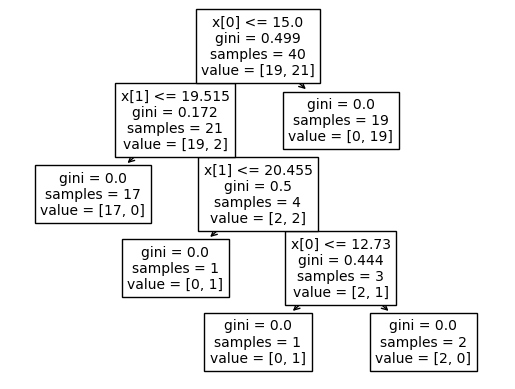

ValueError: Filler values must be provided when X has more than 2 training features.

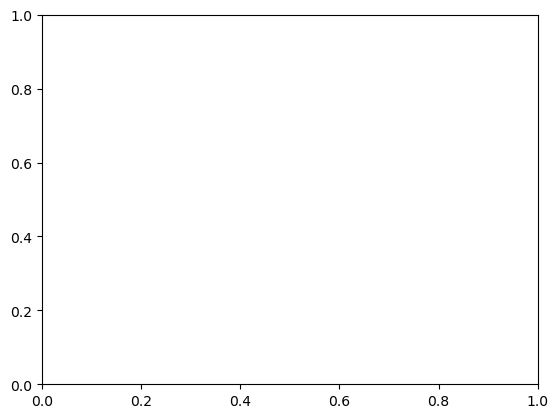

In [23]:
# runninig our model 
evaluate(dt_bag1,X,y)

In [24]:
# Data for Tree 2
df_bag = df_train.sample(40,replace=True)

# Fetch X and y
X = df_bag.iloc[:,2:5]
y = df_bag.iloc[:,1]


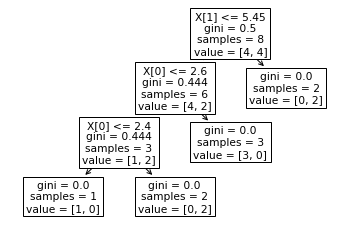

0.4


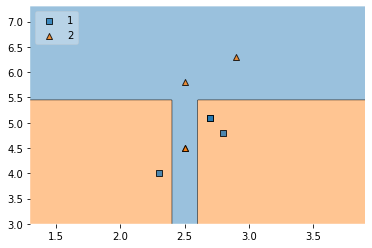

In [55]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [25]:
# Data for Tree 3
df_bag = df_train.sample(40,replace=True)

# Fetch X and y
X = df_bag.iloc[:,2:5]
y = df_bag.iloc[:,1]


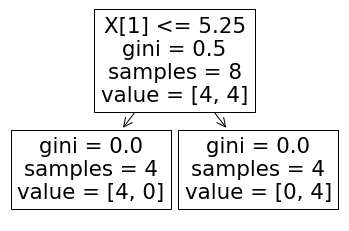

0.8


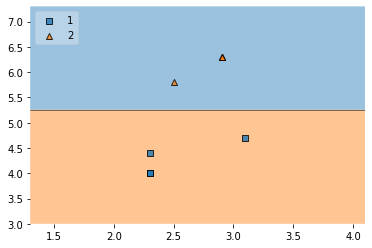

In [57]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [26]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

## Predict

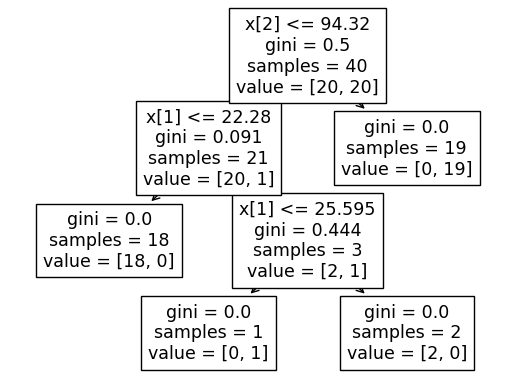

ValueError: Filler values must be provided when X has more than 2 training features.

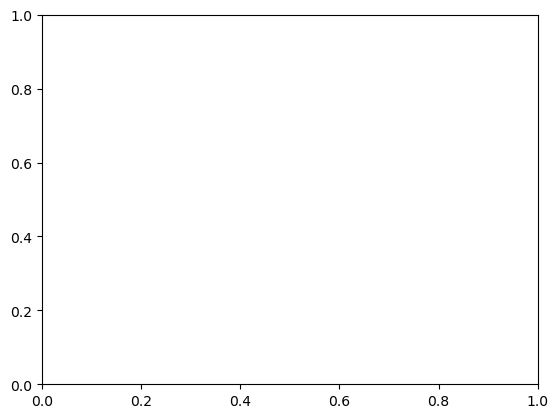

In [27]:
newclf = DecisionTreeClassifier()
evaluate(newclf,X,y)

In [28]:
import numpy as np

In [29]:
print("Predictor 1",dt_bag1.predict(np.array([2.9,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.9,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.9,5.0]).reshape(1,2)))

C:\Users\ABC\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but DecisionTreeClassifier is expecting 3 features as input.

# Different sampling techniques can be used to sampling data 

### Pasting

In [30]:
# Method 1
# Row sampling without replacement
df_train

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
4,84358402,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
522,91789,0,11.260,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,...,11.930,26.43,76.38,435.9,0.11080,0.07723,0.02533,0.02832,0.2557,0.07613
111,86408,0,12.630,20.76,82.15,480.4,0.09933,0.12090,0.106500,0.060210,...,13.330,25.47,89.00,527.4,0.12870,0.22500,0.22160,0.11050,0.2226,0.08486
223,8812877,1,15.750,20.25,102.60,761.3,0.10250,0.12040,0.114700,0.064620,...,19.560,30.29,125.90,1088.0,0.15520,0.44800,0.39760,0.14790,0.3993,0.10640
383,90251,0,12.390,17.48,80.64,462.9,0.10420,0.12970,0.058920,0.028800,...,14.180,23.13,95.23,600.5,0.14270,0.35930,0.32060,0.09804,0.2819,0.11180
381,901836,0,11.040,14.93,70.67,372.7,0.07987,0.07079,0.035460,0.020740,...,12.090,20.83,79.73,447.1,0.10950,0.19820,0.15530,0.06754,0.3202,0.07287
150,871001501,0,13.000,20.78,83.51,519.4,0.11350,0.07589,0.031360,0.026450,...,14.160,24.11,90.82,616.7,0.12970,0.11050,0.08112,0.06296,0.3196,0.06435
337,897630,1,18.770,21.43,122.90,1092.0,0.09116,0.14020,0.106000,0.060900,...,24.540,34.37,161.10,1873.0,0.14980,0.48270,0.46340,0.20480,0.3679,0.09870
110,864033,0,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.017780,...,11.050,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468
27,852781,1,18.610,20.25,122.10,1094.0,0.09440,0.10660,0.149000,0.077310,...,21.310,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341,0.07421


In [31]:
df_train.sample(40)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
108,86355,1,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.426400,0.182300,...,28.400,28.01,206.80,2360.0,0.17010,0.69970,0.96080,0.29100,0.4055,0.09789
266,8910251,0,10.600,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,...,11.880,22.94,78.28,424.8,0.12130,0.25150,0.19160,0.07926,0.2940,0.07587
132,86730502,1,16.160,21.54,106.20,809.8,0.10080,0.12840,0.104300,0.056130,...,19.470,31.68,129.70,1175.0,0.13950,0.30550,0.29920,0.13120,0.3480,0.07619
30,853401,1,18.630,25.11,124.80,1088.0,0.10640,0.18870,0.231900,0.124400,...,23.150,34.01,160.50,1670.0,0.14910,0.42570,0.61330,0.18480,0.3444,0.09782
324,89511501,0,12.200,15.21,78.01,457.9,0.08673,0.06545,0.019940,0.016920,...,13.750,21.38,91.11,583.1,0.12560,0.19280,0.11670,0.05556,0.2661,0.07961
111,86408,0,12.630,20.76,82.15,480.4,0.09933,0.12090,0.106500,0.060210,...,13.330,25.47,89.00,527.4,0.12870,0.22500,0.22160,0.11050,0.2226,0.08486
147,86973701,0,14.950,18.77,97.84,689.5,0.08138,0.11670,0.090500,0.035620,...,16.250,25.47,107.10,809.7,0.09970,0.25210,0.25000,0.08405,0.2852,0.09218
346,898678,0,12.060,18.90,76.66,445.3,0.08386,0.05794,0.007510,0.008488,...,13.640,27.06,86.54,562.6,0.12890,0.13520,0.04506,0.05093,0.2880,0.08083
314,894047,0,8.597,18.60,54.09,221.2,0.10740,0.05847,0.000000,0.000000,...,8.952,22.44,56.65,240.1,0.13470,0.07767,0.00000,0.00000,0.3142,0.08116
239,88330202,1,17.460,39.28,113.40,920.6,0.09812,0.12980,0.141700,0.088110,...,22.510,44.87,141.20,1408.0,0.13650,0.37350,0.32410,0.20660,0.2853,0.08496


### Random Subspaces

In [32]:
df1 = pd.read_csv('breast-cancer.csv')
df1 = df1.sample(10)

In [35]:
df1.sample(2,replace=True,axis=1)

,radius_worst,radius_mean
192,9.968,9.720
272,28.190,21.750
117,18.810,14.870
480,13.340,12.160
221,14.980,13.560
437,15.660,14.040
283,18.550,16.240
511,15.610,14.810
101,7.930,6.981
339,30.670,23.510


### Random Patches
- column sampling

In [ ]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)